In [32]:
print("Hare Krishna")
!pip install qiskit
!pip install qutip

Hare Krishna
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
import numpy as np
import matplotlib.pyplot as plt

E_J = 20e9
w = 5e9
anharm = -300e6

N_phis = 101
phis = np.linspace(-np.pi,np.pi,N_phis)
mid_idx = int((N_phis+1)/2)

# potential energies of the QHO & transmon
U_QHO = 0.5*E_J*phis**2
U_QHO = U_QHO/w
U_transmon = (E_J-E_J*np.cos(phis))
U_transmon = U_transmon/w

In [34]:
# import QuTiP, construct Hamiltonians, and solve for energies
from qutip import destroy
N = 35
N_energies = 5
c = destroy(N)
H_QHO = w*c.dag()*c
E_QHO = H_QHO.eigenenergies()[0:N_energies]
H_transmon = w*c.dag()*c + (anharm/2)*(c.dag()*c)*(c.dag()*c - 1)
E_transmon = H_transmon.eigenenergies()[0:2*N_energies]

In [35]:
print(E_QHO[:4])
print(E_transmon[:8])

[0.0e+00 5.0e+09 1.0e+10 1.5e+10]
[0.00e+00 1.70e+09 5.00e+09 6.60e+09 9.70e+09 1.12e+10 1.41e+10 1.55e+10]


-------------------------------------------
E_transmon	E_Q_Harm Osc	Anharmonicity 
-------------------------------------------
1.00000		1.00000		0.00000
1.94000		2.00000		0.06000
2.82000		3.00000		0.18000
3.64000		4.00000		0.36000
-------------------------------------------



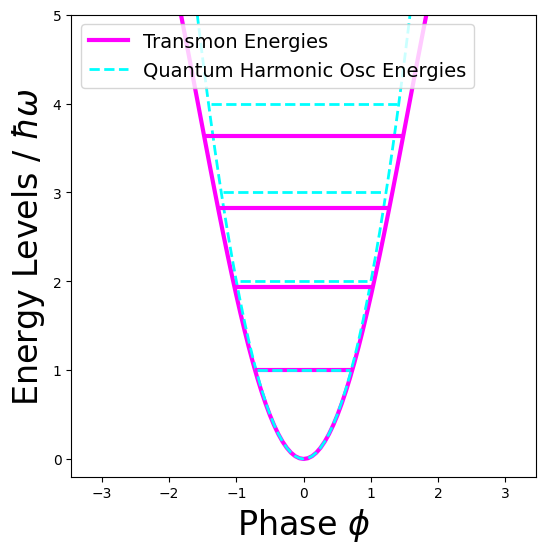

In [36]:
fig, axes = plt.subplots(1, 1, figsize=(6,6))

axes.plot(phis, U_transmon, '-', color='magenta', linewidth=3.0)
axes.plot(phis, U_QHO, '--', color='cyan', linewidth=2.0)

print('-------------------------------------------')
print(f'E_transmon\tE_Q_Harm Osc\tAnharmonicity ')
print('-------------------------------------------')
for eidx in range(1,N_energies):
    delta_E_QHO = (E_QHO[eidx]-E_QHO[0])/w
    delta_E_transmon = (E_transmon[2*eidx]-E_transmon[0])/w
    print(f'{delta_E_transmon :.5f}\t\t{delta_E_QHO :.5f}\t\t{delta_E_QHO - delta_E_transmon :.5f}')
    QHO_lim_idx = min(np.where(U_QHO[int((N_phis+1)/2):N_phis] > delta_E_QHO)[0])
    trans_lim_idx = min(np.where(U_transmon[int((N_phis+1)/2):N_phis] > delta_E_transmon)[0])
    trans_label, = axes.plot([phis[mid_idx-trans_lim_idx-1], phis[mid_idx+trans_lim_idx-1]], \
                             [delta_E_transmon, delta_E_transmon], '-', color='magenta', linewidth=3.0)
    qho_label, = axes.plot([phis[mid_idx-QHO_lim_idx-1], phis[mid_idx+QHO_lim_idx-1]], \
                           [delta_E_QHO, delta_E_QHO], '--', color='cyan', linewidth=2.0)
    
print('-------------------------------------------\n')
axes.set_xlabel('Phase $\phi$', fontsize=24)
axes.set_ylabel('Energy Levels / $\hbar\omega$', fontsize=24)
axes.set_ylim(-0.2,5)

qho_label.set_label('Quantum Harmonic Osc Energies')
trans_label.set_label('Transmon Energies')
axes.legend(loc=2, fontsize=14)
